## GERDA LIGHT
This notebook is meant to test out and use the reduced  version of GERDA.

The "Light" version build upon the synthetic population created with the orginial GERDA by using the agent_information Dataframe (*ai.df) and the contact table p_l_t, which states the location ID for all agents for all timesteps (hours) for one week.

Worklfow:
- create a new world object 
- initialize a model with this world object
- set seed infections
- simulate the model 


PS.: ## - comment,  # - hide lines


In [1]:
import GERDA_light as gl 
import numpy as np
import logging as log
import matplotlib.pyplot as plt

plt.style.use('dark_background')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
logger = log.getLogger()
logger.setLevel(log.DEBUG)
logger.disabled = True


### initialize a world 

In [3]:

w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=False,
           )
w2 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=True,
           k_I=0.2,
           only_P1=True,
           )
w3 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           dT=24,
           k_I=0.2,
           only_P1=False, ## dT>1 -> only P1 must be False
           )


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
w3.contacts.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [5]:
model = gl.SIS_model(w1)#no clustering
i = 1   # selected agent ID 
for i in range(1,7):
    model.world.agents[i].state=1 ## infect one agent
    model.world.agents[i].times['infection'] = 0 
model.run(timespan=2000, only_inf_rel_contacts=True, only_infection=True)

In [6]:
ai_df_1 = model.world.ai_df
ai_df_1
#plt.plot(model.world.infect_prob_dist_per_size[1])
#len(model.world.infect_prob_dist_per_size[1])

,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,737.0,0,737.0
1,152,265,under_age,16,265,5,1,907.0,0,907.0
2,205,373,public_worker,34,373,2,1,1122.0,0,1122.0
3,564,1059,adult,53,1059,2,1,1005.0,0,1005.0
4,100,177,adult,40,177,2,1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1054,202,365,adult,22,365,2,1,883.0,0,883.0
1055,230,416,public_worker,67,416,2,1,904.0,0,904.0
1056,558,1041,under_age,11,1041,4,1,994.0,0,994.0
1057,201,362,under_age,1,362,3,1,836.0,0,836.0


In [9]:
model3 = gl.SIS_model(w3)#no clustering
i = 1   # selected agent ID 
for i in range(1,7):
    model3.world.agents[i].state=1 ## infect one agent
    model3.world.agents[i].times['infection'] = 0 
model3.run(timespan=int(2000/model.world.dT), only_inf_rel_contacts=True, only_infection=True)
ai_df_3 = model3.world.ai_df


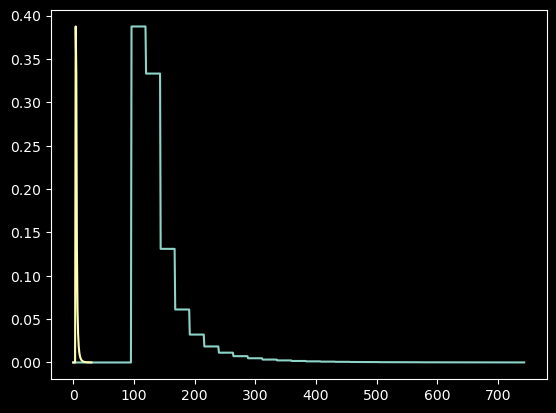

In [12]:
plt.plot(model1.world.infect_prob_dist_per_size[1])
plt.plot(model3.world.infect_prob_dist_per_size[1])


### initialize models 

In [11]:
model1 = gl.SIS_model(w1) ## no clustering
model2 = gl.SIS_model(w2,determine_inf_times_for_cluster=False, clusters=True) ##clustering , determine_inf_times_for_cluster=True does not work anymore
model3 = gl.SIS_model(w3) ## no clustering dT=12

### infect an agent 

In [13]:
for model in [model1,model2,model3]:
    #i = 1   ## selected agent ID 
    for i in range(1,7):
        model.world.agents[i].state=1 ## infect one agent
        model.world.agents[i].times['infection'] = 0 

### run simulations

In [14]:
## run a simulation
for model in [model1, model2, model3]:
    model.run(timespan=600, only_inf_rel_contacts=True, only_infection=True)

In [15]:
ai_df_1 = model1.world.ai_df
ai_df_2 = model2.world.ai_df
ai_df_3 = model3.world.ai_df

display(ai_df_1.head(10))
display(ai_df_2.head(10))
display(ai_df_3.head(10))



,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,443.0,0,443.0
1,152,265,under_age,16,265,5,1,NaN,0,NaN
2,205,373,public_worker,34,373,2,1,NaN,0,NaN
3,564,1059,adult,53,1059,2,1,563.0,0,563.0
4,100,177,adult,40,177,2,1,NaN,0,NaN
5,87,149,public_worker,22,149,4,1,NaN,0,NaN
6,163,289,under_age,6,289,4,1,NaN,0,NaN
7,68,115,adult,56,115,6,1,NaN,0,NaN
8,65,105,public_worker,22,105,2,1,NaN,0,NaN
9,207,377,public_worker,61,377,2,1,NaN,0,NaN


,home,h_ID,type,age,household_size,cluster,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,4,51,4,253.0,0,253.0
1,152,265,under_age,16,5,215,5,182.0,0,182.0
2,205,373,public_worker,34,2,160,2,323.0,0,323.0
3,564,1059,adult,53,2,75,2,389.0,0,389.0
4,100,177,adult,40,2,229,6,363.0,0,363.0
5,87,149,public_worker,22,4,40,4,183.0,0,183.0
6,163,289,under_age,6,4,43,4,292.0,0,292.0
7,68,115,adult,56,6,53,10,105.0,0,105.0
8,65,105,public_worker,22,2,37,2,NaN,0,NaN
9,207,377,public_worker,61,2,188,2,303.0,0,303.0


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,27.0,0,27.0
1,152,265,under_age,16,265,5,1,31.0,0,31.0
2,205,373,public_worker,34,373,2,1,37.0,0,37.0
3,564,1059,adult,53,1059,2,1,13.0,0,13.0
4,100,177,adult,40,177,2,1,NaN,0,NaN
5,87,149,public_worker,22,149,4,1,28.0,0,28.0
6,163,289,under_age,6,289,4,1,16.0,0,16.0
7,68,115,adult,56,115,6,1,21.0,0,21.0
8,65,105,public_worker,22,105,2,1,30.0,0,30.0
9,207,377,public_worker,61,377,2,1,NaN,0,NaN


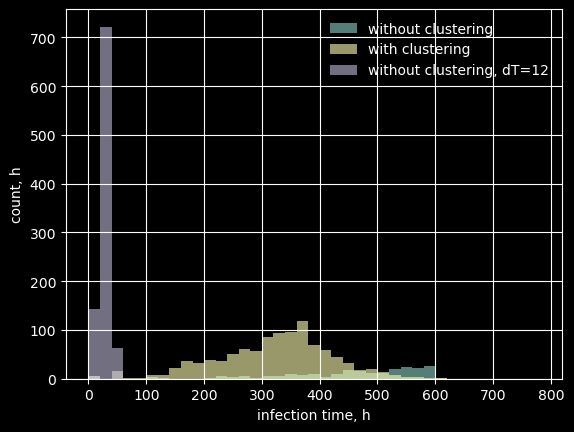

In [16]:
ai_df_1['infection_time'].hist(alpha=0.6,label='without clustering',bins=np.arange(0,800,20))
ai_df_2['infection_time'].hist(alpha=0.6,label='with clustering', bins=np.arange(0,800,20))
ai_df_3['infection_time'].hist(alpha=0.6,label='without clustering, dT=12', bins=np.arange(0,800,20))
plt.xlabel('infection time, h')
plt.ylabel('count, h')
plt.legend(frameon=False)

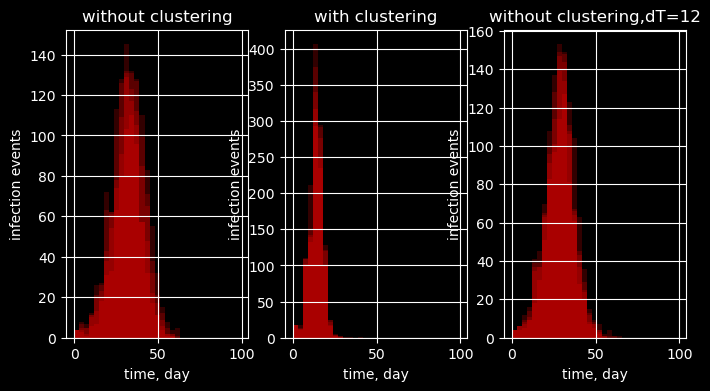

In [20]:
fig, axes = plt.subplots(1,3, figsize=(8,4))
inf_times = []
for k in range(5):
    for l,model in enumerate([model1,model2,model3]):
        model.reset()
        model.ID = k
        for i in range(1,5):
            model.world.agents[i].state=1 ## infect one agent
            model.world.agents[i].times['infection'] = 0 
        model.run(timespan=1500,only_inf_rel_contacts=True, only_infection=True)
        inf_times.append(model.world.ai_df[['h_ID','infection_time']])
        model.world.ai_df['infection_day'] =  model.world.ai_df[~ model.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model.world.dT/24))
        model.world.ai_df['infection_day'].hist(alpha=0.2, ax = axes[l], bins=np.arange(0,100,3), color='red')

axes[0].set_title(f'without clustering')
axes[1].set_title(f'with clustering')
axes[2].set_title(f'without clustering,dT=12')
for ax in axes:
    ax.set_ylabel('infection events')
    ax.set_xlabel('time, day')
     

In [107]:
model1.world.contacts.keys()
model3.world.dT

24

In [125]:
model3.world.ai_df['infection_time'].mean()#.hist(alpha=0.5, ax = axes[l], bins=np.arange(0,150,100))
#model.world.ai_df#[~ model.world.ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*model.world.dT/24))

226.84513692162417

array([[<Axes: title={'center': 'infection_time'}>]], dtype=object)

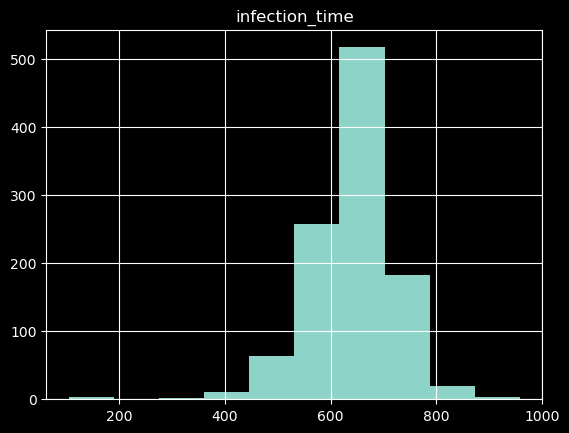

In [46]:
import pandas as pd
ai_combined = pd.concat(inf_times,axis=0)
#pd.merge(on='h_ID')
ai_combined.groupby('h_ID').mean().hist()